#Overview:
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

#Image classification in the SVHN Dataset using KNN algorithm

In [0]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#change the directory and go to the directory where datset is present
cd drive

/content/drive


In [6]:
cd My\ Drive

/content/drive/My Drive


In [7]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
ls -all

total 7
drwx------ 2 root root 4096 Dec 17 05:45 NN_Project1_Dataset/
-rw------- 1 root root 2591 Dec 17 05:55 Untitled0.ipynb


In [8]:
cd NN_Project1_Dataset/

/content/drive/My Drive/Colab Notebooks/NN_Project1_Dataset


In [0]:
#import the library to read the dataset
import h5py

In [0]:
#To open and read data we use the same File method in read mode, r
hdf = h5py.File('SVHN_single_grey1.h5','r')

In [11]:
#To see what data is in this file, we can call the keys() method on the file object.
list(hdf.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
#We can then grab each dataset we created above using the get method, specifying the name.
X_test = np.array(hdf.get('X_test'))
X_train = np.array(hdf.get('X_train'))
X_val = np.array(hdf.get('X_val'))
y_test = np.array(hdf.get('y_test'))
y_train = np.array(hdf.get('y_train'))
y_val = np.array(hdf.get('y_val'))

In [13]:
#display the shape of dataframe
print("shape of X_train::",X_train.shape)
print("shape of X_test::",X_test.shape)
print("shape of X_val::",X_val.shape)
print("shape of y_train::",y_train.shape)
print("shape of y_test::",y_test.shape)
print("shape of y_val::",y_val.shape)

shape of X_train:: (42000, 32, 32)
shape of X_test:: (18000, 32, 32)
shape of X_val:: (60000, 32, 32)
shape of y_train:: (42000,)
shape of y_test:: (18000,)
shape of y_val:: (60000,)


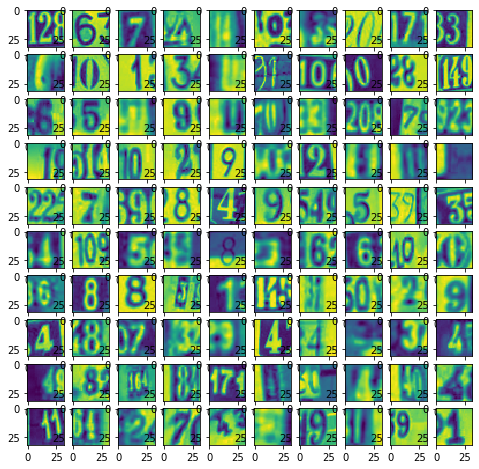

In [14]:
#display the images from train dataset
fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10
for i in range(1,columns*rows+1):
  img = X_train[i-1]
  fig.add_subplot(rows,columns,i)
  plt.imshow(img)
plt.show()

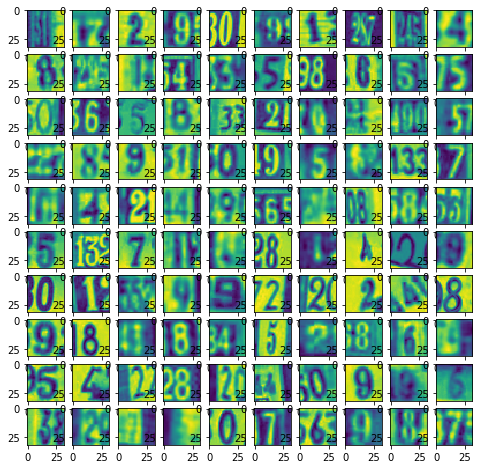

In [15]:
#display the images from test dataset
fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10
for i in range(1,columns*rows +1):
  img = X_test[i-1]
  fig.add_subplot(rows,columns,i)
  plt.imshow(img)
plt.show()

In [0]:
#flateten the x_train and x_test because the shape of dataset is 32*32 we have to make 1d vector
x_tr = []
for i in range(X_train.shape[0]):
  x_tr.append(X_train[i,:].flatten())

x_te = []
for i in range(X_test.shape[0]):
  x_te.append(X_test[i,:].flatten())

In [17]:
#display the len of train and test datset 
print(len(x_tr),len(x_tr[0]))
print(len(x_te),len(x_te[0]))

42000 1024
18000 1024


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
# empty list that will hold accuracy scores
neighbors = [7,9,11,13,15,17,19]
ac_scores = []

# perform accuracy metrics for values from 7,9,11,13,15,17,19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_tr, y_train)
    # predict the response
    y_pred_var = knn.predict(x_te)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred_var)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 17


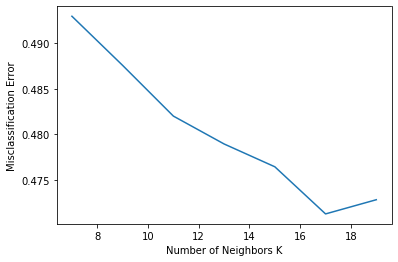

In [22]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [23]:
#call the fit method and fit on train dataset
knn_opt = KNeighborsClassifier(n_neighbors=17) #Initialize the object
knn_opt.fit(x_tr, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [0]:
#predict on test datset
knn_opt_y_predict = knn_opt.predict(x_te)

In [25]:
#display the accuracy score
accuracy_score(y_test, knn_opt_y_predict)

0.5287222222222222

In [0]:
#import the library for classification report
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, knn_opt_y_predict))

              precision    recall  f1-score   support

           0       0.45      0.70      0.55      1814
           1       0.46      0.73      0.56      1828
           2       0.62      0.55      0.59      1803
           3       0.45      0.43      0.44      1719
           4       0.67      0.65      0.66      1812
           5       0.51      0.39      0.44      1768
           6       0.50      0.41      0.45      1832
           7       0.71      0.62      0.67      1808
           8       0.47      0.36      0.41      1812
           9       0.55      0.43      0.48      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.52     18000
weighted avg       0.54      0.53      0.52     18000



#Conclusions:
->From above we can see that we got optimal k value as 17 and we fit the knn algorithm based on 17 neighbours.
->The accuracy we got is 53% on test dataset and this accuracy is on otimal k value which is 17.
->The time it took to find the optimal k value is around 3 hours and again it took again around 45 minutes to predict the label on test dataset.
->So from above we can see that knn is very time consuming and not giving good accuracy.
->I run knn on google colab which will provide high configure machine than my own machine/laptop and on google colab it took aroud 3 hours to find the optimal k value. but if i train on my laptop then it's even more worse
->So the point to note here is that knn is not good for these types of problems so we will go to neural net and see how they performs.